
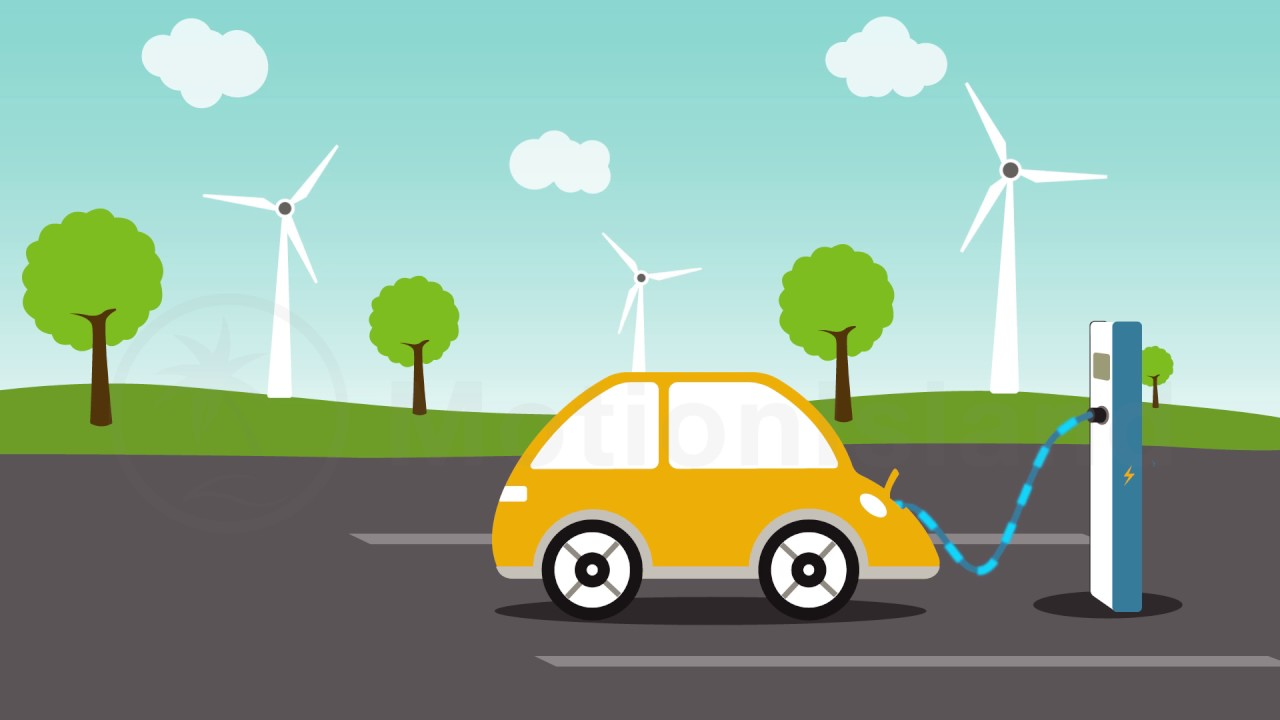

### Project by: Sweta Patel

# Analysis of Consumer Preferences and Factors Influencing Choices Between Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs)

## Business Problem:
### Electric vehicles are becoming increasingly popular as consumers and policymakers seek cleaner and more sustainable transportation options. One key decision that consumers face when choosing an electric vehicle is whether to opt for a battery electric vehicle (BEV) or a plug-in hybrid electric vehicle (PHEV). This decision has important implications for factors such as range, fuel efficiency, and overall environmental impact.

### For stakeholders in the electric vehicle industry, understanding the factors that influence consumers' choices between BEVs and PHEVs is crucial for developing effective marketing strategies, designing innovative products, and informing public policy. By analyzing data on electric vehicle types and their characteristics, stakeholders can gain valuable insights into consumer preferences and behaviors, identify trends in the market, and anticipate future demand for different types of electric vehicles.

### For consumers, having access to information about the differences between BEVs and PHEVs can help them make more informed decisions when purchasing an electric vehicle. By understanding the trade-offs between factors such as electric range, fuel efficiency, and potential cost savings, consumers can choose the type of electric vehicle that best meets their individual needs and preferences.

## By conducting an analysis of electric vehicle types and their characteristics, stakeholders and consumers can gain insights into the following key questions:

### 1.What factors influence consumers' choices between battery electric vehicles (BEVs) and plug-in hybrid electric vehicles (PHEVs)?
### 2.How do the characteristics of BEVs and PHEVs, such as electric range and base MSRP, impact consumer preferences and purchasing decisions?
### 3.How can stakeholders in the electric vehicle industry use this information to develop more effective marketing strategies, design innovative products, and inform public policy?
### 4.How can consumers use this information to make more informed decisions when purchasing an electric vehicle that meets their individual needs and preferences?
### By addressing these key questions through an analysis of electric vehicle types and their characteristics, stakeholders and consumers can ultimately work together to accelerate the adoption of electric vehicles, reduce greenhouse gas emissions, and create a more sustainable transportation system for the future.


## Hypothesis Questions: 
## Is there a relationship between the electric vehicle type (BEV or PHEV) and eligibility for Clean Alternative Fuel Vehicle (CAFV) incentives, how does this influence consumer preferences and choices in the electric vehicle market?

## Is the eligibility for Clean Alternative Fuel Vehicle (CAFV) a significant predictor of the Electric Vehicle Type?

## Does the electric range of the vehicle affect its eligibility as a battery electric vehicle (BEV) or clean alternative fuel vehicle (CAFV)?

In [186]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_recall_curve 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,  average_precision_score

from sklearn.naive_bayes import GaussianNB
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score


In [187]:
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')

In [188]:
df.head(5)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [189]:
df.shape

(177866, 17)

In [190]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,177861.000000,177866.000000,177866.000000,177866.000000,177477.000000,1.778660e+05,1.778610e+05
mean,98172.453506,2020.515512,58.842162,1073.109363,29.127481,2.202313e+08,5.297672e+10
std,2442.450668,2.989384,91.981298,8358.624956,14.892169,7.584987e+07,1.578047e+09
min,1545.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,18.000000,1.814743e+08,5.303301e+10
50%,98122.000000,2022.000000,0.000000,0.000000,33.000000,2.282522e+08,5.303303e+10
75%,98370.000000,2023.000000,75.000000,0.000000,42.000000,2.548445e+08,5.305307e+10
max,99577.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [192]:
df.apply(lambda x: sum(x.isnull()))

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

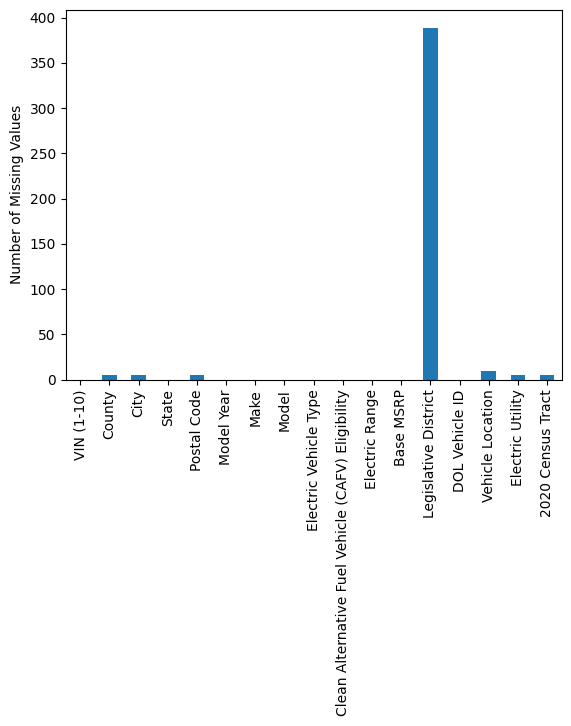

In [193]:
missing_values = df.isnull().sum() 
missing_values.plot(kind='bar') 
plt.ylabel('Number of Missing Values') 
plt.show()

In [194]:
#Fill null values in Postal Code column
df['Postal Code'].fillna(0, inplace=True)

#Fill null values in Legislative District column
df['Legislative District'].fillna(0, inplace=True)

#Fill null values in Vehicle Location column
df['Vehicle Location'].fillna('Unknown', inplace=True)

#Fill null values in Electric Utility column
df['Electric Utility'].fillna('Utility not available', inplace=True)

#Fill null values in 2020 Census Tract column
df['2020 Census Tract'].fillna(0, inplace=True)

# Fill null values in city and county columns with 'Unknown'
df['City'].fillna('Unknown', inplace=True)
df['County'].fillna('Unknown', inplace=True)


In [195]:
df.duplicated().sum()

0

In [196]:
df.apply(lambda x: len(x.unique()))

VIN (1-10)                                            10830
County                                                  197
City                                                    724
State                                                    46
Postal Code                                             863
Model Year                                               22
Make                                                     40
Model                                                   139
Electric Vehicle Type                                     2
Clean Alternative Fuel Vehicle (CAFV) Eligibility         3
Electric Range                                          102
Base MSRP                                                31
Legislative District                                     50
DOL Vehicle ID                                       177866
Vehicle Location                                        862
Electric Utility                                         77
2020 Census Tract                       

In [97]:
from scipy.stats import zscore
# Assuming your data is in a pandas DataFrame called 'df'

# Iterate through each variable and calculate the number of outliers
outlier_counts = {}
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        z_scores = np.abs(zscore(df[col]))
        outlier_count = len(np.where(z_scores > 3.5)[0])
        outlier_counts[col] = outlier_count

# Print the sum of outliers for each variable
for col, count in outlier_counts.items():
    print(f"Variable {col} has {count} outliers.")

Variable Postal Code has 272 outliers.
Variable Model Year has 60 outliers.
Variable Electric Range has 0 outliers.
Variable Base MSRP has 3344 outliers.
Variable Legislative District has 0 outliers.
Variable DOL Vehicle ID has 0 outliers.
Variable 2020 Census Tract has 315 outliers.


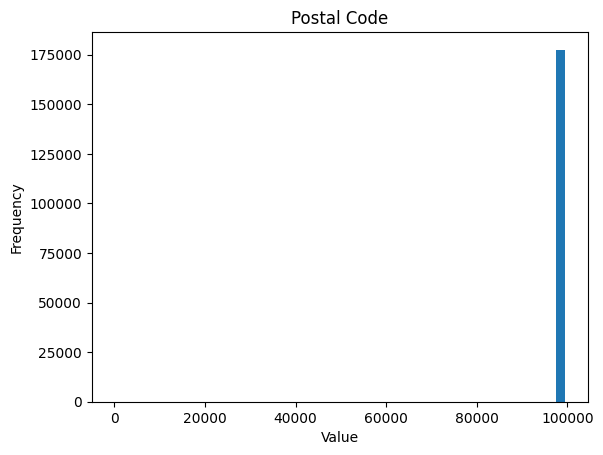

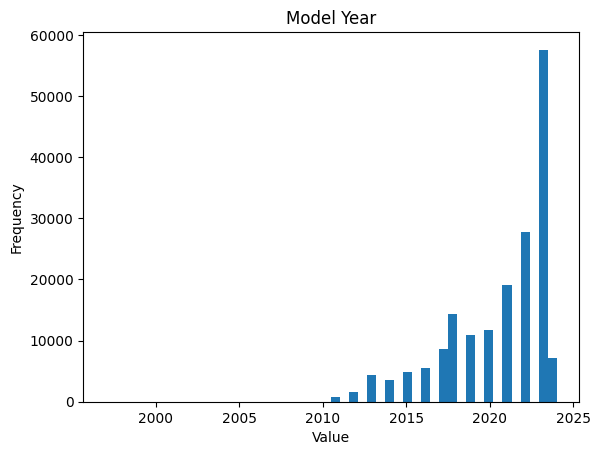

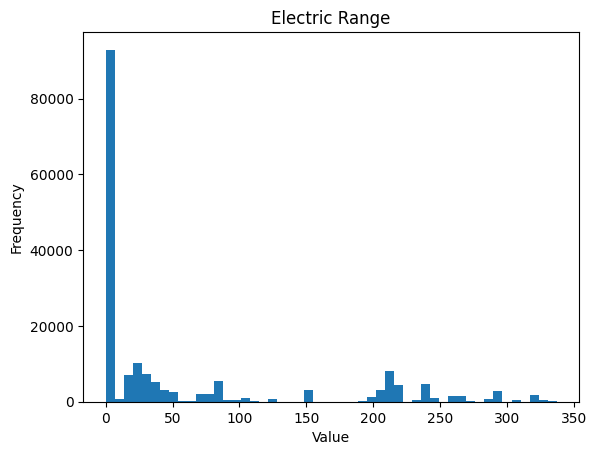

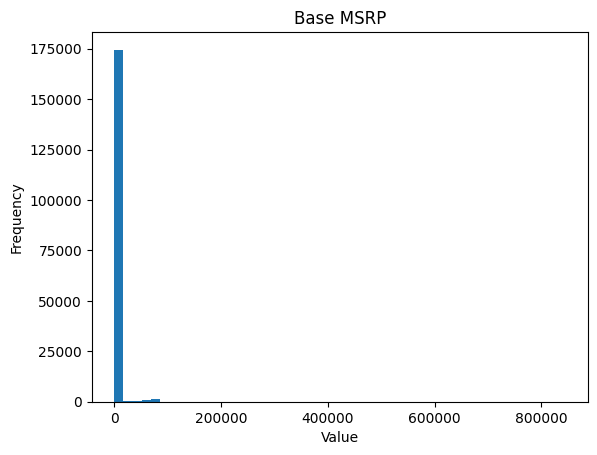

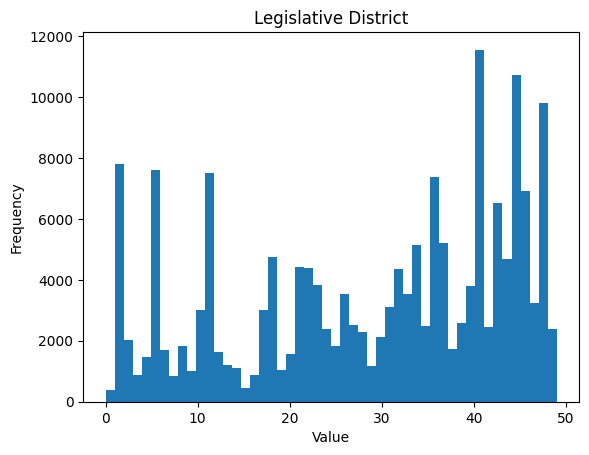

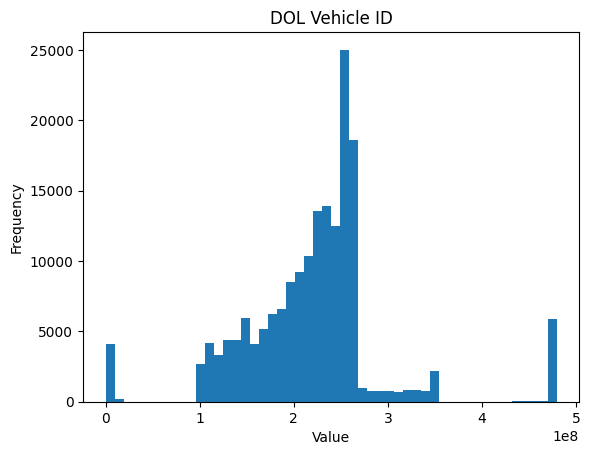

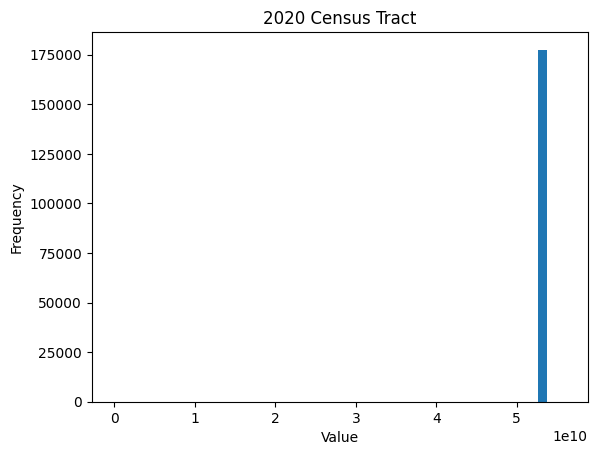

In [98]:
#Plot a histogram for each variable to visualize outliers
for col in df.columns: 
    if df[col].dtype in ['int64', 'float64']: 
        plt.figure() 
        plt.hist(df[col], bins=50) 
        plt.title(col) 
        plt.xlabel('Value') 
        plt.ylabel('Frequency') 
        plt.show()

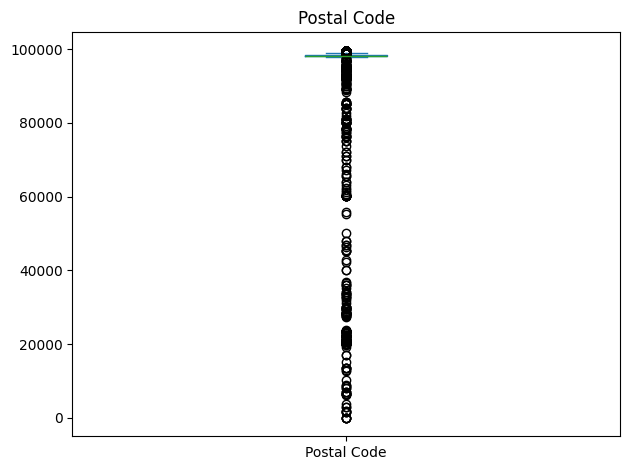

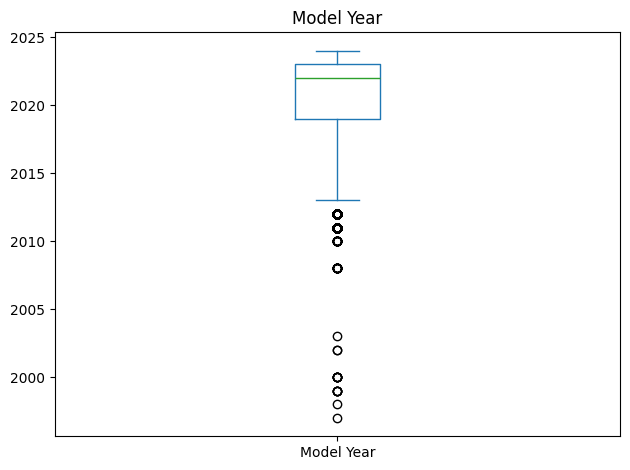

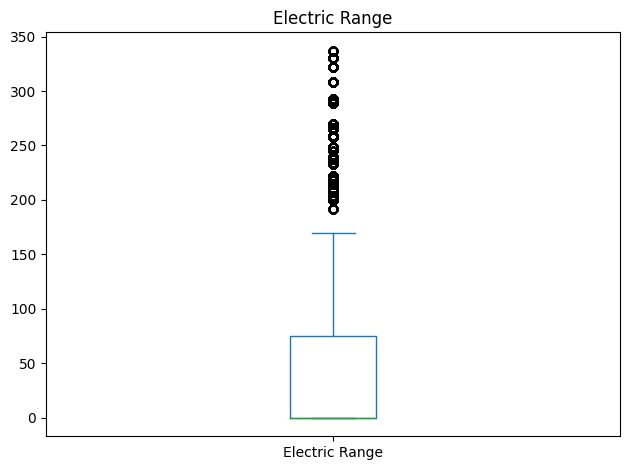

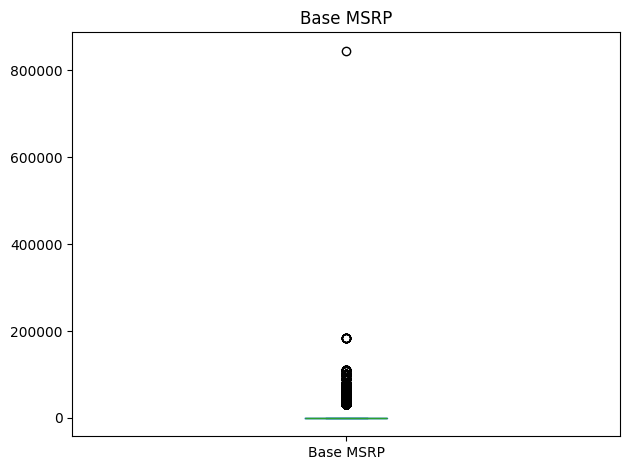

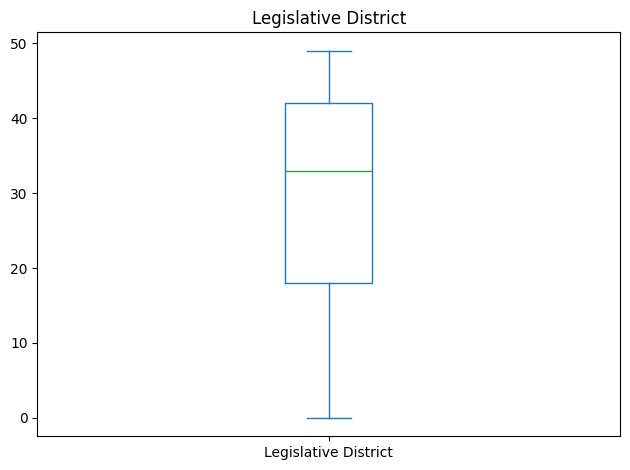

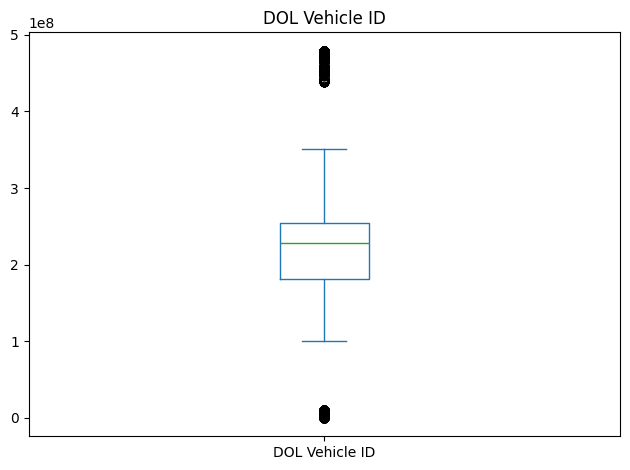

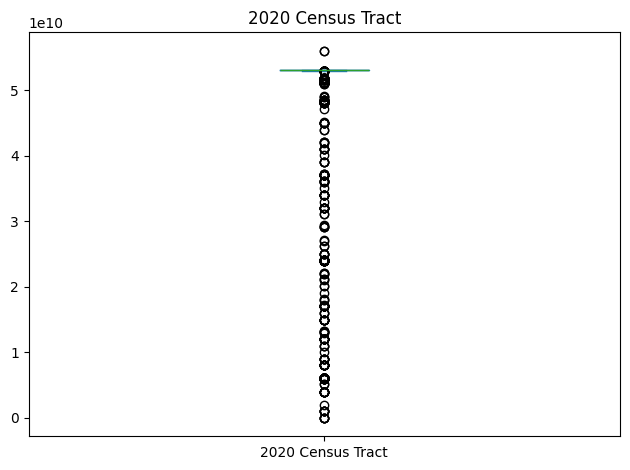

In [99]:
# List of numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Plot each numeric variable in a separate chart
for col in numeric_columns:
    plt.figure()
    df[col].plot(kind='box')
    plt.title(col)
    plt.tight_layout()

plt.show()

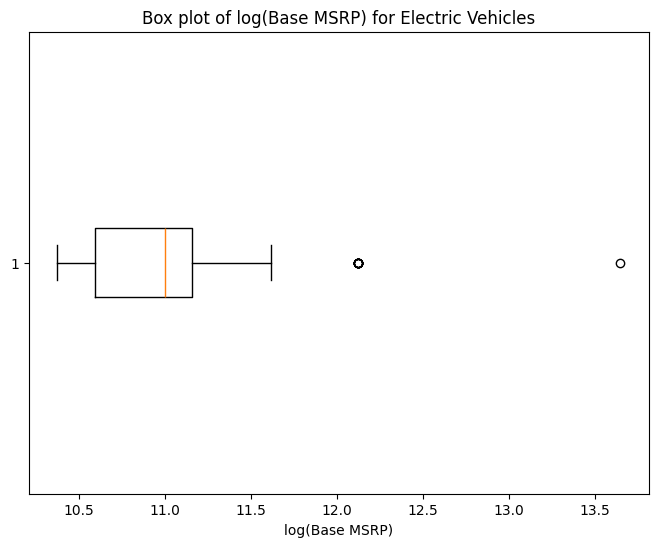

In [200]:
plt.figure(figsize=(8, 6)) 
filtered_msrp = df[df['Base MSRP'] > 0]['Base MSRP']
plt.boxplot(np.log(filtered_msrp), vert=False) 
plt.title('Box plot of log(Base MSRP) for Electric Vehicles') 
plt.xlabel('log(Base MSRP)') 
plt.show()

In [100]:
#Remove outliers using z-score method
def remove_outliers(df, cols, threshold=2.5): 
    for col in cols: z_scores = zscore(df[col]) 
    abs_z_scores = np.abs(z_scores) 
    outliers = (abs_z_scores > threshold) 
    df = df[~outliers] 
    return df

cols = ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 'DOL Vehicle ID', '2020 Census Tract'] 
df = remove_outliers(df, cols)
df
print("Outliers removed. New shape of dataframe:", df.shape)

Outliers removed. New shape of dataframe: (177528, 17)


In [101]:
# define a function to map state codes to state names
def state_mapping(state_code):
    state_mapping = {
        'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas',
        'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware',
        'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho',
        'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
        'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
        'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi',
        'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada',
        'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York',
        'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
        'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
        'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah',
        'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia',
        'WI': 'Wisconsin', 'WY': 'Wyoming'
    }
    return state_mapping.get(state_code, 'Unknown')

# Apply the 'state_mapping' function to 'State' column
df['State'] = df['State'].apply(state_mapping)
    

# EDA

In [102]:
# identify categorical columns in the DataFrame
category = [i for i in df.columns if df[i].dtype == 'object']

# iterate over each categorical column

for col in category:
    # print the value counts for the current column
    print(df[col].value_counts())
    print()

VIN (1-10)
7SAYGDEE6P    1237
7SAYGDEE7P    1235
7SAYGDEE8P    1196
7SAYGDEEXP    1188
7SAYGDEE5P    1177
              ... 
WA132BFZ4R       1
SADHD2S10P       1
WBY33FK05R       1
1FMCU0EZ0M       1
WMEFK9BA7J       1
Name: count, Length: 10823, dtype: int64

County
King               92740
Snohomish          21001
Pierce             13782
Clark              10409
Thurston            6428
Kitsap              5840
Spokane             4586
Whatcom             4253
Benton              2147
Skagit              1910
Island              1882
Clallam             1058
Chelan              1047
Yakima               995
Jefferson            974
San Juan             942
Cowlitz              897
Mason                823
Lewis                739
Grays Harbor         625
Kittitas             623
Franklin             585
Grant                561
Walla Walla          437
Douglas              364
Whitman              334
Klickitat            284
Okanogan             263
Stevens              219
Pacifi

<Axes: >

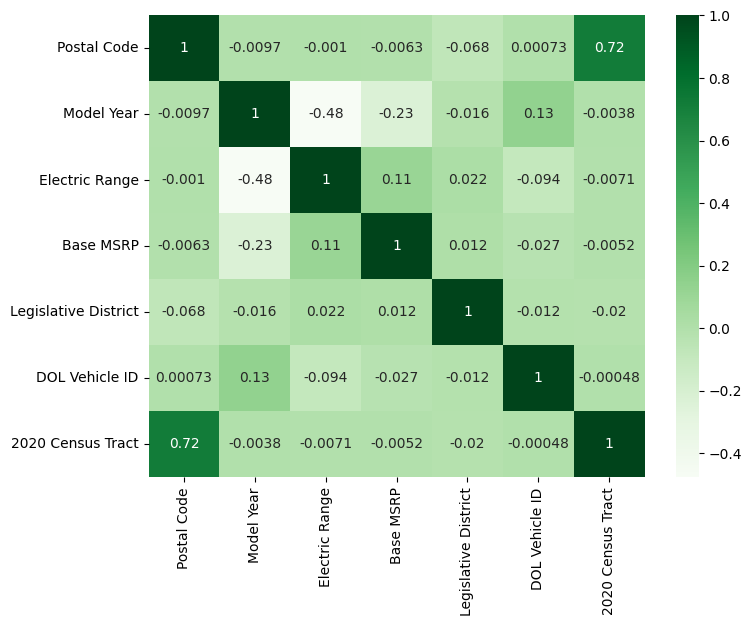

In [103]:
num_col=['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID', '2020 Census Tract']
plt.figure(figsize=(8, 6))
sns.heatmap(df[num_col].corr(),annot=True,cmap='Greens')

Overall, the correlation matrix reveals varying degrees of relationships between the variables in the dataset. Some variables, such as Postal Code and 2020 Census Tract, show a strong positive correlation, suggesting a clear connection between them. On the other hand, variables like Model Year and Base MSRP exhibit weak or no correlation with other variables, indicating independence. These insights can help in identifying potential patterns or trends within the data and guide further analysis or decision-making processes.

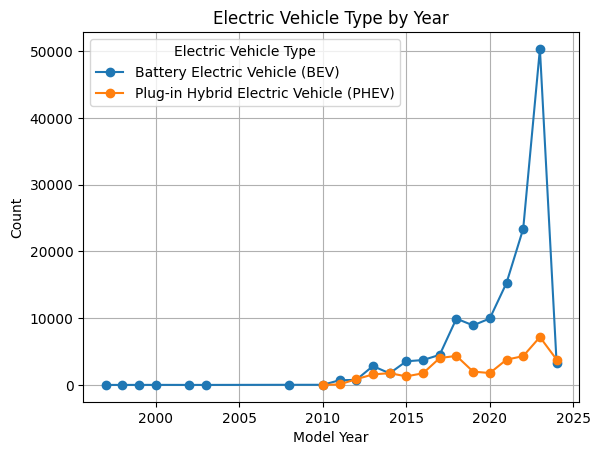

In [104]:
# Group by Model Year and Electric Vehicle Type
grouped_data = df.groupby(['Model Year', 'Electric Vehicle Type']).size().unstack()

# Plot the line chart
grouped_data.plot(kind='line', marker='o')
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.title('Electric Vehicle Type by Year')
plt.legend(title='Electric Vehicle Type')
plt.grid(True)
plt.show()

Based on the data provided, it appears that there is a significant increase in the number of electric vehicles being produced in 2023 compared to 2022. Specifically, the number of Battery Electric Vehicles (BEVs) has increased from 4000 in 2015 to 50,000 in 2023. This represents more than double the production of BEVs in just one year.

Similarly, the production of Plug-in Hybrid Electric Vehicles (PHEVs) has also increased fro2 5,000 in 1522 to 8,000 in 2023, indicating a growth in the production of this type of electric vehicle as well.

The increase in the production of both BEVs and PHEVs in 2023 could be attributed to several factors, including technological advancements, consumer demand for electric vehicles, government incentives and regulations promoting the adoption of clean transportation, and an overall shift towards sustainability in the automotive industry.

Overall, the results suggest a growing trend toBEVcation in the automotive industry, with an increasing number of electric vehicles being produced each year.

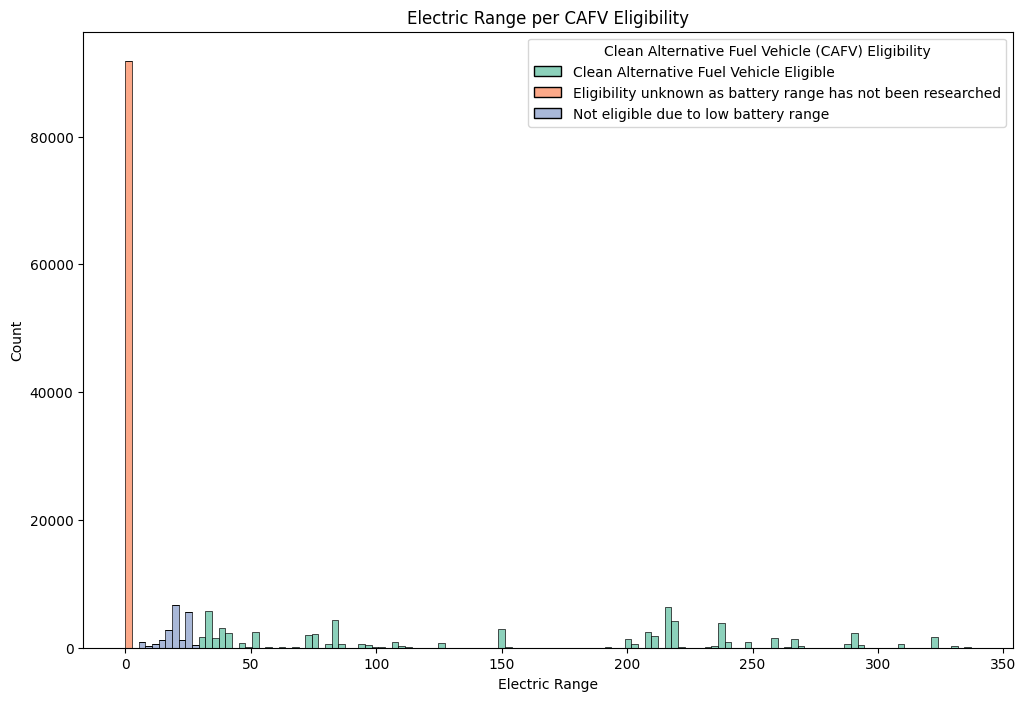

In [105]:
import seaborn as sns
plt.figure(figsize=(12, 8)) 
sns.histplot(data=df, x="Electric Range", hue="Clean Alternative Fuel Vehicle (CAFV) Eligibility", multiple="stack", palette="Set2") 
plt.xlabel("Electric Range") 
plt.ylabel("Count") 
plt.title("Electric Range per CAFV Eligibility") 
plt.show()

Higer electric range has higher eligibility for clean alternative fuel vehicle

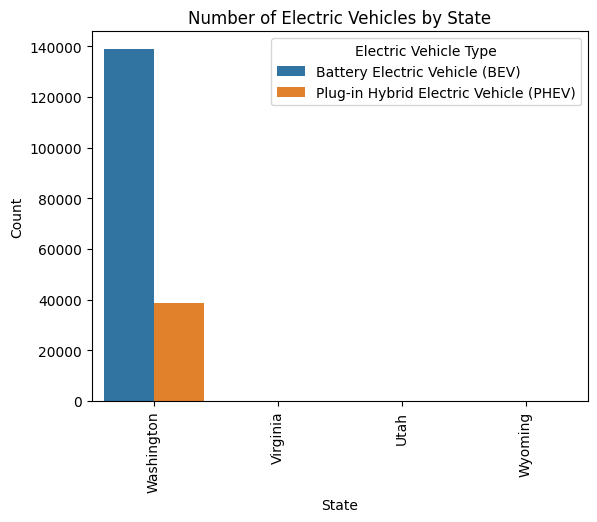

In [106]:
sns.countplot(x='State', hue='Electric Vehicle Type', data=df,order=df['State'].value_counts().iloc[:10].index) 
plt.title('Number of Electric Vehicles by State') 
plt.xticks(rotation=90) 
plt.xlabel('State') 
plt.ylabel('Count') 
plt.show()

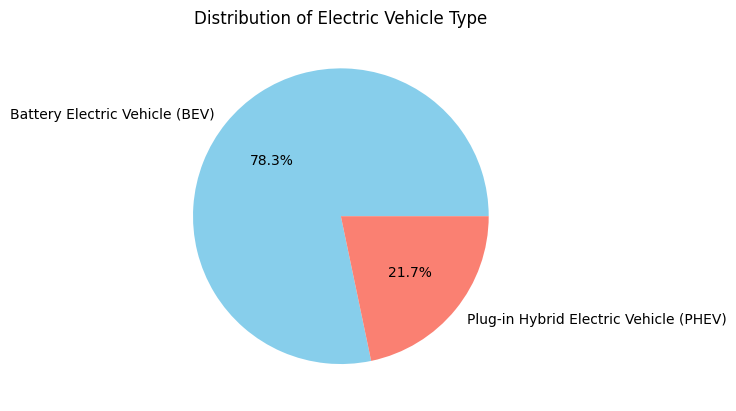

In [107]:
df['Electric Vehicle Type'].value_counts().plot(kind='pie', colors=['skyblue', 'salmon'],autopct='%1.1f%%') 
plt.ylabel('') 
plt.title('Distribution of Electric Vehicle Type') 
plt.show()

Electric vehicles of the BEV (Battery Electric Vehicle) type have the largest percentage of 78.3%.Based from the chart the data is highly imbalanced in terms of classes

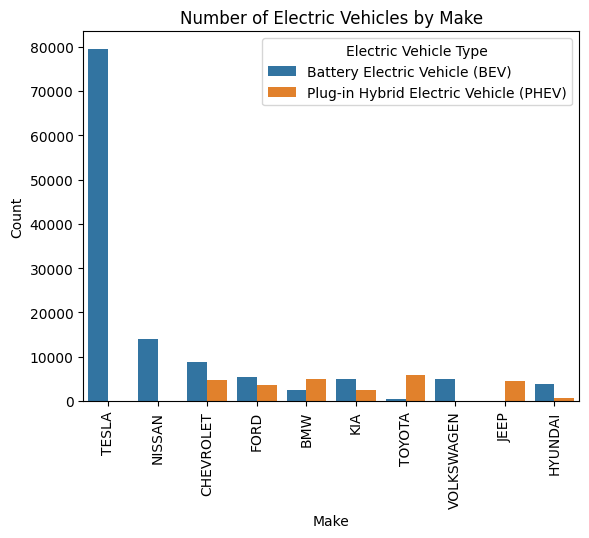

<Figure size 1000x1200 with 0 Axes>

In [108]:
sns.countplot(x='Make', hue='Electric Vehicle Type', data=df,order=df['Make'].value_counts().iloc[:10].index) 
plt.title('Number of Electric Vehicles by Make') 
plt.xticks(rotation=90) 
plt.xlabel('Make') 
plt.ylabel('Count') 
plt.figure(figsize=(10, 12))
plt.show()

Tesla, Volkswagen and Nissan has a make of only Battery electric vehicle rest other companies has a make of both Battery Electric Vehicle and Plugin hybrid electric vehicle

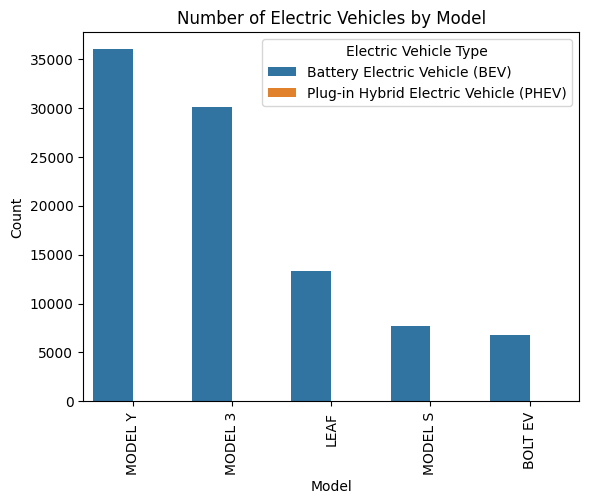

<Figure size 1000x1200 with 0 Axes>

In [109]:
sns.countplot(x='Model', hue='Electric Vehicle Type', data=df, order=df['Model'].value_counts().iloc[:5].index) 
plt.title('Number of Electric Vehicles by Model') 
plt.xticks(rotation=90) 
plt.xlabel('Model') 
plt.ylabel('Count') 
plt.figure(figsize=(10, 12)) 
plt.show()

All models were battery electric vehicle type

Text(0, 0.5, 'Count')

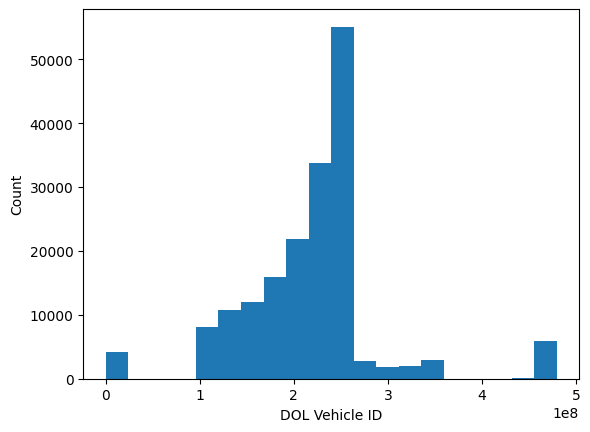

In [110]:
plt.hist(df["DOL Vehicle ID"],bins=20)
plt.xlabel("DOL Vehicle ID")
plt.ylabel("Count")

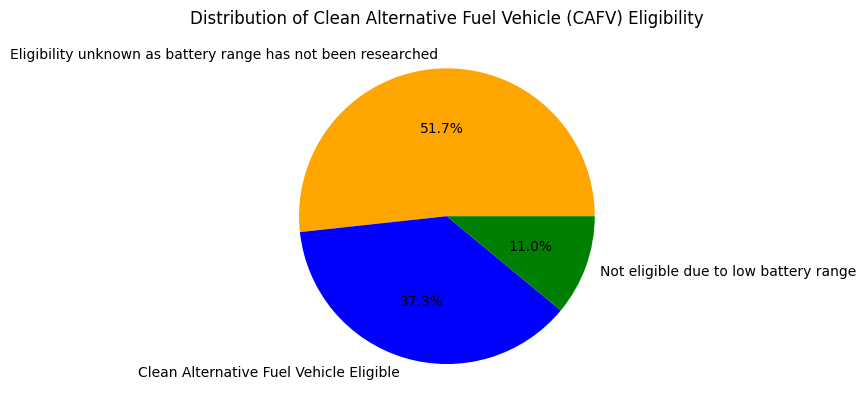

In [111]:
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts().plot(kind='pie', colors=['orange', 'blue','green'], autopct='%1.1f%%') 
plt.ylabel('') 
plt.title('Distribution of Clean Alternative Fuel Vehicle (CAFV) Eligibility') 
plt.show()

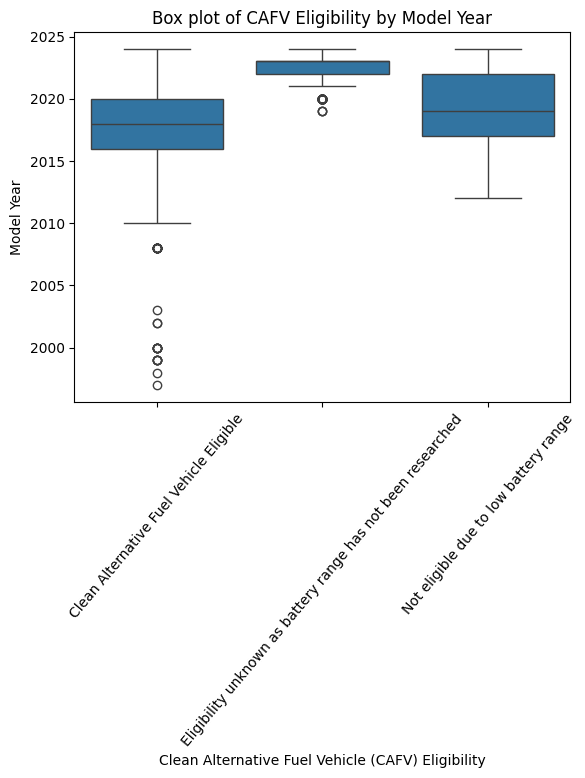

In [112]:
plt.title("Box plot of CAFV Eligibility by Model Year")
sns.boxplot(x="Clean Alternative Fuel Vehicle (CAFV) Eligibility", y="Model Year", data=df)
plt.xticks(rotation=50)
plt.show()

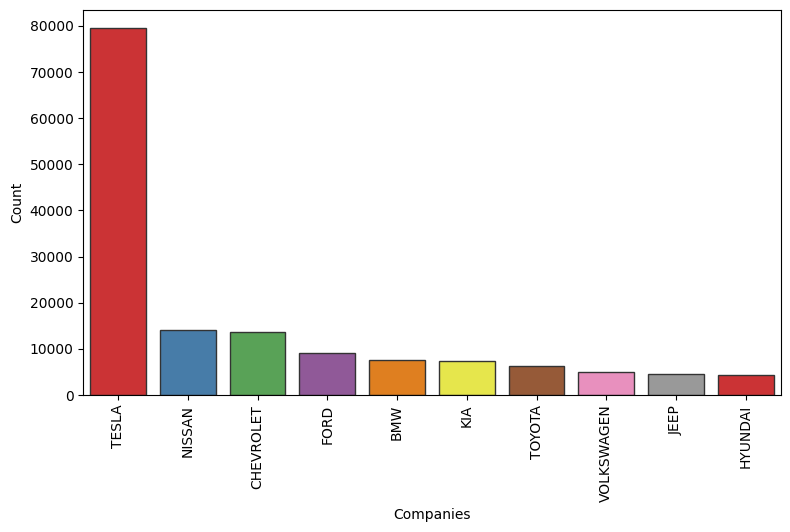

In [113]:
Companies = df.groupby('Make').count().sort_values(by='City',ascending=False)['City'].index
values = df.groupby('Make').count().sort_values(by='City',ascending=False)['City'].values


plt.figure(figsize=(9,5))
import seaborn as sns
sns.barplot(x=list(Companies)[:10], y=values[:10], hue=list(Companies)[:10], edgecolor='.2', palette='Set1', legend=False)
plt.xticks(rotation=90)
plt.xlabel('Companies')
plt.ylabel('Count')
plt.show()

Tesla has the most electric vehicles

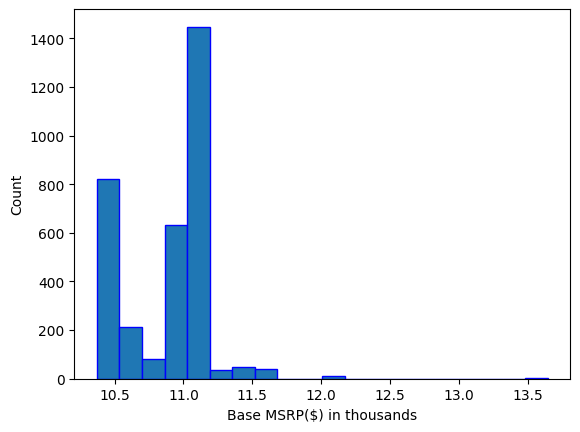

In [114]:
# Filter out zero or negative values
filtered_msrp = df[df['Base MSRP'] > 0]['Base MSRP']

# Take the logarithm of filtered values
log_msrp = np.log(filtered_msrp)

# Plot the histogram
plt.hist(log_msrp, bins=20, edgecolor='blue')
plt.xlabel("Base MSRP($) in thousands")
plt.ylabel("Count")
plt.show()

The data shows that most electric vehicles have a base MSRP in the range of $30,000 to $60,000, with the majority of vehicles falling within this range. There are a few outliers with higher base MSRPs, such as $110,950 and $184,400, which may be luxury electric vehicles or models with advanced features.

It is also worth noting that there is a wide range of base MSRPs for electric vehicles, ranging from $1,367 to $174,194. This may be due to different factors such as the size and type of the vehicle, the brand, the battery capacity, and the technology included in the vehicle.

Overall, the data suggests that electric vehicles are becoming more diverse in terms of pricing, with options available for a range of budgets and preferences.

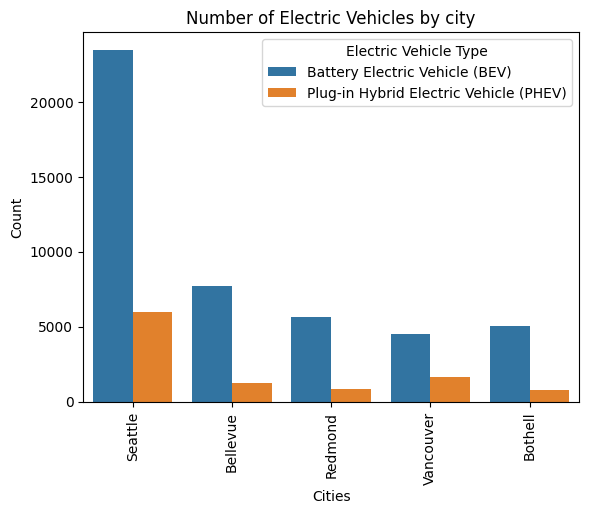

<Figure size 1000x1200 with 0 Axes>

In [115]:
sns.countplot(x='City', hue='Electric Vehicle Type', data=df,order=df['City'].value_counts().iloc[:5].index)
plt.title('Number of Electric Vehicles by city') 
plt.xticks(rotation=90) 
plt.xlabel('Cities') 
plt.ylabel('Count') 
plt.figure(figsize=(10, 12)) 
plt.show()

Seattle had the highest range of electric vehicle usage and in that BEV was highly used compared to PHEV

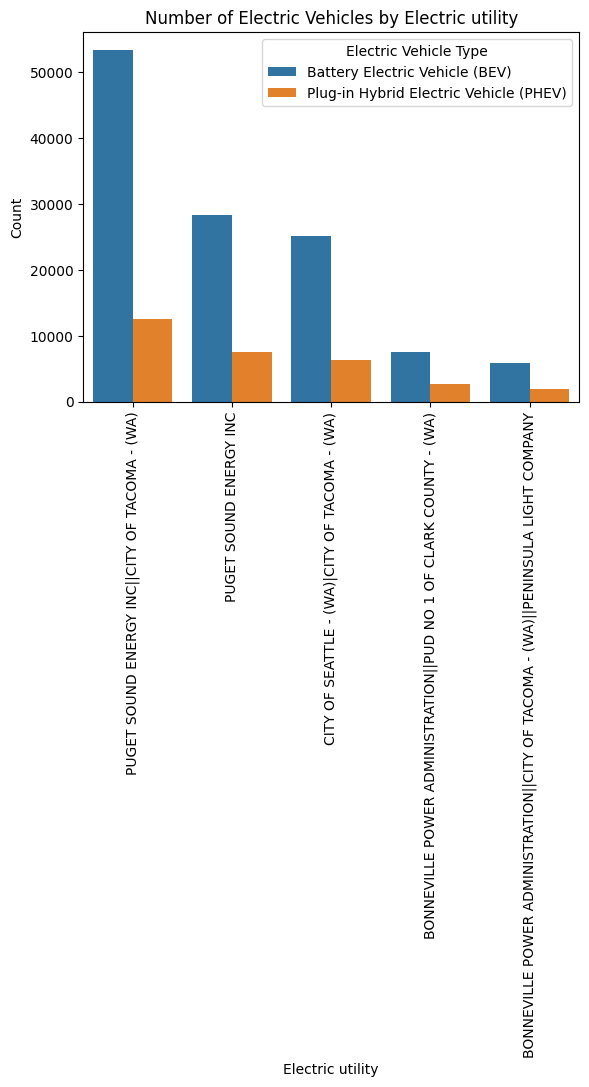

<Figure size 1000x1200 with 0 Axes>

In [116]:
sns.countplot(x='Electric Utility', hue='Electric Vehicle Type', data=df,order=df['Electric Utility'].value_counts().iloc[:5].index) 
plt.title('Number of Electric Vehicles by Electric utility') 
plt.xticks(rotation=90) 
plt.xlabel('Electric utility') 
plt.ylabel('Count') 
plt.figure(figsize=(10, 12))
plt.show()

Electric vehicles with Puget Sound Energy electric utilities were the most common at 58% (BEV and PHEV)

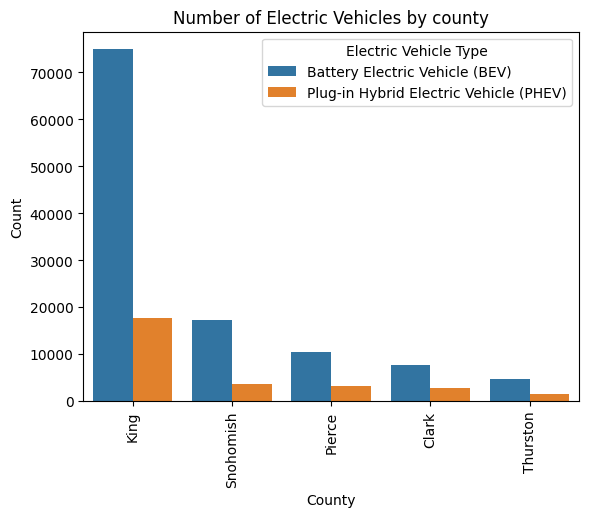

<Figure size 1000x1200 with 0 Axes>

In [117]:
sns.countplot(x='County', hue='Electric Vehicle Type', data=df,order=df['County'].value_counts().iloc[:5].index)
plt.title('Number of Electric Vehicles by county') 
plt.xticks(rotation=90) 
plt.xlabel('County') 
plt.ylabel('Count') 
plt.figure(figsize=(10, 12)) 
plt.show()

King County has the highest number of electric vehicles with 78000 for BEV and 18000 for PHEV.

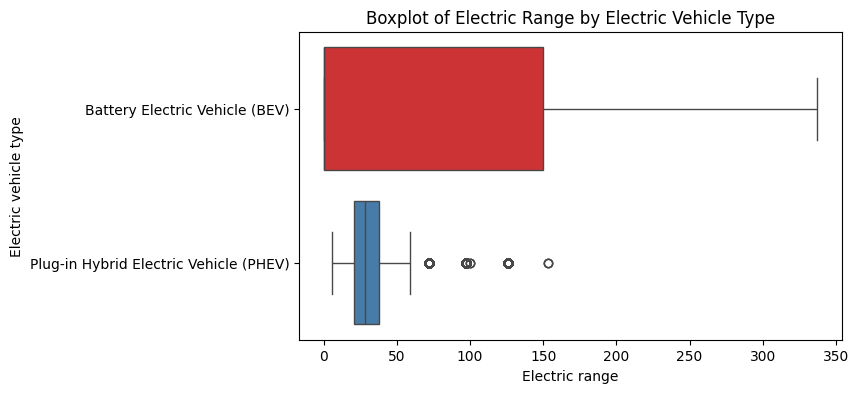

In [118]:
plt.figure(figsize=(7,4)) 
sns.boxplot(x='Electric Range', y='Electric Vehicle Type', hue='Electric Vehicle Type', data=df, palette='Set1', legend=False)
plt.xlabel('Electric range') 
plt.ylabel('Electric vehicle type') 
plt.title('Boxplot of Electric Range by Electric Vehicle Type') 
plt.show()

For BEVs, half of the electric range falls between 0 to 150 miles, whereas for PHEVs, 50% of the range lies 
between 01 to408 miles.

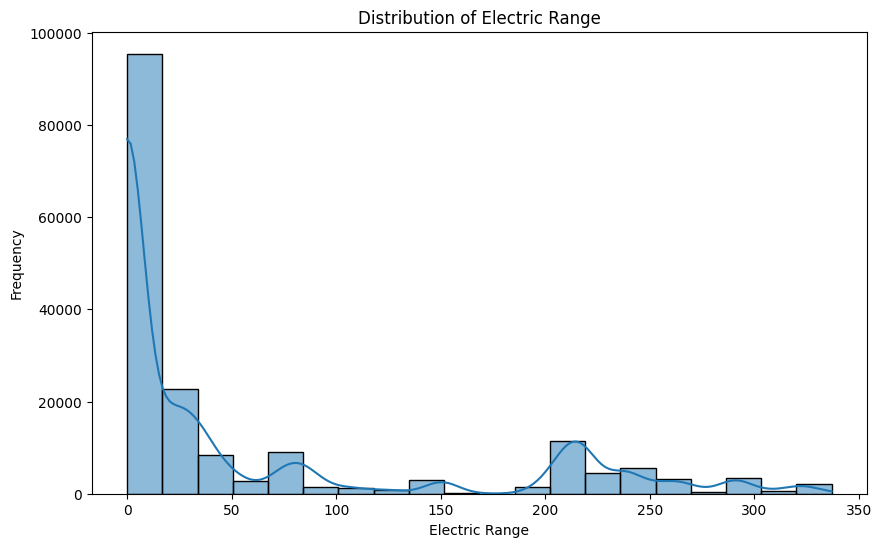

In [119]:
#Perform univariate analysis for the 'Electric Range' variable
plt.figure(figsize=(10, 6)) 
sns.histplot(df['Electric Range'], bins=20, kde=True) 
plt.title('Distribution of Electric Range') 
plt.xlabel('Electric Range') 
plt.ylabel('Frequency') 
plt.show()

# Feature Engineering

In [120]:
df['Model_Age'] = 2023 - df['Model Year'] # Create 'Model_Age' variable
df['Electric_Range_Category'] = ['High' if x > 200 else 'Low' for x in df['Electric Range']] # Create 'Electric_Range_Category' variable
# Filter out zero or negative values


In [121]:
df.head(2)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Model_Age,Electric_Range_Category
0,5YJYGDEE1L,King,Seattle,Washington,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,3,High
1,7SAYGDEE9P,Snohomish,Bothell,Washington,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10,0,Low


In [122]:
df.apply(lambda x: sum(x.isnull()))

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
Model_Age                                            0
Electric_R

In [123]:
df = df.drop(['VIN (1-10)', 'Postal Code', 'DOL Vehicle ID', 'Vehicle Location', '2020 Census Tract','Electric Range','Model Year','County','City','State'], axis=1)

In [124]:
df.head(2)

,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Base MSRP,Legislative District,Electric Utility,Model_Age,Electric_Range_Category
0,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,0,37.0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),3,High
1,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,1.0,PUGET SOUND ENERGY INC,0,Low


In [125]:
label_encoder = LabelEncoder()
#Encode categorical variables with ordinal values
df['Electric_Range_Category'] = label_encoder.fit_transform(df['Electric_Range_Category'])
df['Electric Vehicle Type']=label_encoder.fit_transform(df['Electric Vehicle Type'])

#one-hot encoding
nominal_vars = ['Make', 'Model', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Utility'] 
df = pd.get_dummies(df, columns=nominal_vars)

print(df.head())

   Electric Vehicle Type  Base MSRP  Legislative District  Model_Age  \
0                      0          0                  37.0          3   
1                      0          0                   1.0          0   
2                      0          0                  36.0          4   
3                      0          0                   5.0          7   
4                      0          0                  23.0          2   

   Electric_Range_Category  Make_ALFA ROMEO  Make_AUDI  Make_AZURE DYNAMICS  \
0                        0            False      False                False   
1                        1            False      False                False   
2                        0            False      False                False   
3                        0            False      False                False   
4                        1            False      False                False   

   Make_BENTLEY  Make_BMW  ...  Electric Utility_PORTLAND GENERAL ELECTRIC CO  \
0         F

In [126]:
df.shape

(177528, 263)

## Model Training and Evaluation

In [127]:
#split data into features ans target
feature= df.drop(['Electric Vehicle Type'], axis=1)
target= df['Electric Vehicle Type']

In [128]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler() 
X, y = rus.fit_resample(feature, target)

In [129]:
y.value_counts()

Electric Vehicle Type
0    38547
1    38547
Name: count, dtype: int64

In [130]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [131]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [132]:
#Feature selection using SelectFromModel with Random Forest classifier
from sklearn.feature_selection import SelectFromModel

#Initialize Random Forest classifier
rf = RandomForestClassifier()

#Fit the model
rf.fit(X_train_scaled, y_train)

#Feature selection
sfm = SelectFromModel(rf, prefit=True) 
X_train_selected = sfm.transform(X_train_scaled) 
X_test_selected = sfm.transform(X_test_scaled)

In [133]:
X_train_selected=pd.DataFrame(X_train_selected)
X_test_selected=pd.DataFrame(X_test_selected)

In [134]:
#selected features
X_train_selected.shape, X_test_selected.shape

((61675, 26), (15419, 26))

In [135]:
#Initialize Random Forest classifier
rf_selected = RandomForestClassifier()

#Fit the model
rf_selected.fit(X_train_selected, y_train)

#Make predictions
y_pred_rf_train = rf_selected.predict(X_train_selected)
y_pred_rf = rf_selected.predict(X_test_selected)

In [136]:
#Classification report
print("Random Forest Classification Report train:") 
print(accuracy_score(y_train, y_pred_rf_train))
print("Random Forest Classification Report test:") 
print(accuracy_score(y_test, y_pred_rf))

Random Forest Classification Report train:
0.9951195784353466
Random Forest Classification Report test:
0.9950710162786173


our predictions are almost 99.51% accurate,we have identified 99.50% of the electric vehicle type correctly for Random Forest model.

In [137]:
#Confusion matrix
cm_train=confusion_matrix(y_train, y_pred_rf_train)
cm_test=confusion_matrix(y_test, y_pred_rf)
print("Random Forest Confusion Matrix train_set:") 
print(cm_train)
print("Random Forest Confusion Matrix test_set:") 
print(cm_test)

Random Forest Confusion Matrix train_set:
[[30610   227]
 [   74 30764]]
Random Forest Confusion Matrix test_set:
[[7652   58]
 [  18 7691]]


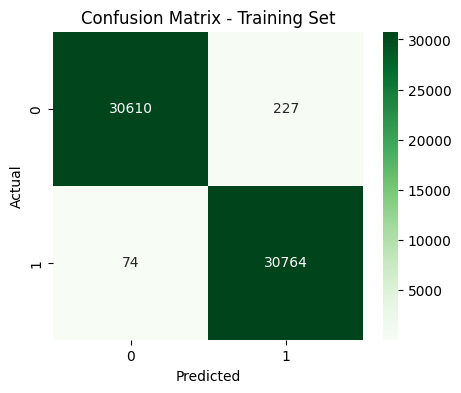

In [138]:
# Plot the confusion matrix for the training set
plt.figure(figsize=(5,4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Training Set')
plt.show()

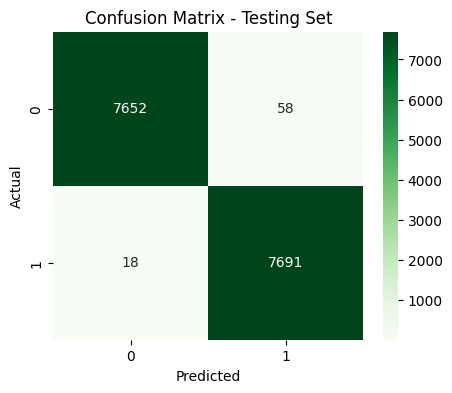

In [139]:
# Plot the confusion matrix for the testing set
plt.figure(figsize=(5,4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Testing Set')
plt.show()

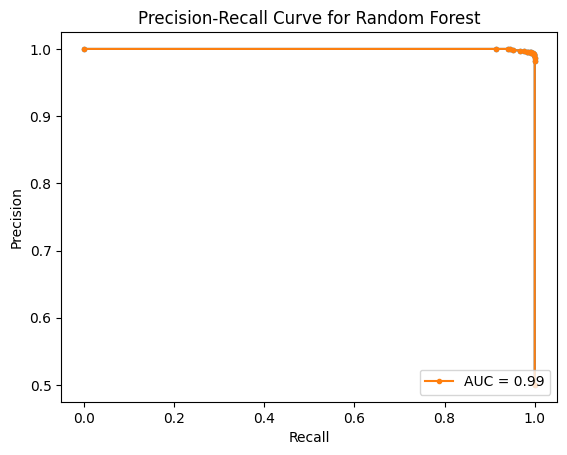

In [140]:
#Precision-Recall curve
rf_auc = average_precision_score(y_test, y_pred_rf)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, rf_selected.predict_proba(X_test_selected)[:, 1]) 
plt.plot(recall_rf, precision_rf, marker='.') 
plt.xlabel('Recall') 
plt.ylabel('Precision') 
plt.title('Precision-Recall Curve for Random Forest')
plt.plot(recall_rf, precision_rf, marker='.', label=f"AUC = {rf_auc:.2f}")
plt.legend(loc = 'lower right')
plt.show()

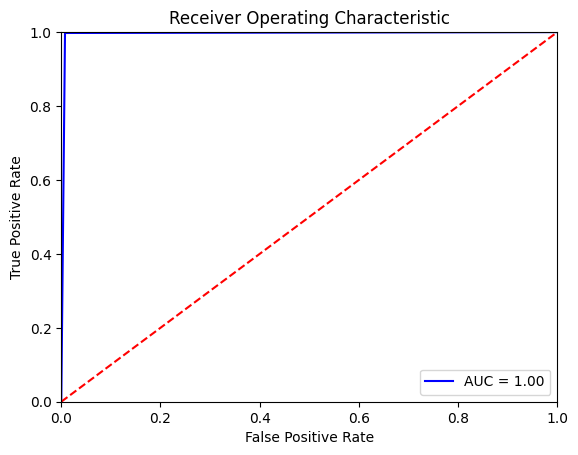

In [141]:
#ROC curve
# calculate the fpr and tpr for all thresholds of the classification
probs = rf_selected.predict_proba(X_test_selected)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test,y_pred_rf)
roc_auc = metrics.auc(fpr, tpr)

# method : plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [142]:
from sklearn.model_selection import cross_val_score

#Perform cross-validation
cv_scores = cross_val_score(rf_selected, X_train_selected, y_train, cv=5)

#Print the cross-validation scores
print("Cross-validation scores:", cv_scores) 
print("Mean CV accuracy:", np.mean(cv_scores))

Cross-validation scores: [0.9945683  0.99529793 0.99505472 0.99448723 0.99554114]
Mean CV accuracy: 0.9949898662342926


In [143]:
from sklearn.tree import export_graphviz 
import pydot

#Choose a tree to plot
tree = rf_selected.estimators_[0]

#Export the tree to a DOT file
export_graphviz(tree, out_file='tree.dot', feature_names=X_train_selected.columns, rounded=True, precision=1)

In [144]:
#Use the DOT file to create a graph
#(graph,) = pydot.graph_from_dot_file('tree.dot')

#Save the graph as a PNG file
#graph.write_png('tree.png')

In [145]:
#Initialize Logistic Regression classifier
lr_selected = LogisticRegression(max_iter=1000)

#Fit the model
lr_selected.fit(X_train_selected, y_train)

#Make predictions
y_pred_lr_train = lr_selected.predict(X_train_selected)
y_pred_lr = lr_selected.predict(X_test_selected)

In [146]:
print("Logistic Regression Classification Report train set:") 
print(accuracy_score(y_train, y_pred_lr_train))
print("Logistic Regression Classification Report test set:") 
print(accuracy_score(y_test, y_pred_lr))
print(classification_report(y_train, y_pred_lr_train))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Classification Report train set:
0.9938873125253345
Logistic Regression Classification Report test set:
0.9929307996627538
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     30837
           1       0.99      1.00      0.99     30838

    accuracy                           0.99     61675
   macro avg       0.99      0.99      0.99     61675
weighted avg       0.99      0.99      0.99     61675

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      7710
           1       0.99      1.00      0.99      7709

    accuracy                           0.99     15419
   macro avg       0.99      0.99      0.99     15419
weighted avg       0.99      0.99      0.99     15419



our predictions are almost 99.38% accurate,we have identified 99.29% of the electric vehicle type correctly for logistic regression model

In [147]:
print("Logistic Regression Confusion Matrix:") 
print(confusion_matrix(y_test, y_pred_lr))
print(confusion_matrix(y_train, y_pred_lr_train))

Logistic Regression Confusion Matrix:
[[7618   92]
 [  17 7692]]
[[30535   302]
 [   75 30763]]


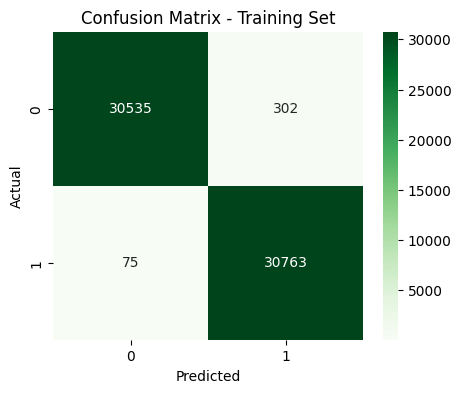

In [148]:
cmt_train=confusion_matrix(y_train, y_pred_lr_train)
# Plot the confusion matrix for the training set
plt.figure(figsize=(5, 4))
sns.heatmap(cmt_train, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Training Set')
plt.show()

For the train classification task, there were 30826 instances of BEVs correctly classified and 30535 instances of PHEVs correctly classified. There were 302 instances of PHEVs incorrectly classified as BEVs and 75 instances of BEVs incorrectly classified as PHEVs.


In [ ]:
cmtx_test=confusion_matrix(y_test, y_pred_lr)
# Plot the confusion matrix for the testing set
plt.figure(figsize=(5, 4))
sns.heatmap(cmtx_test, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Testing Set')
plt.show()

For the test classification task, it seems that there were 7710 instances of battery electric vehicles (BEVs) correctly classified and 7618 instances of plug-in hybrid electric vehicles (PHEVs) correctly classified. Additionally, there were 92 instances of PHEVs incorrectly classified as BEVs and 17 instances of BEVs incorrectly classified as PHEVs.

Overall, the logistic regression model performed well in terms of classifying electric vehicles as either BEVs or PHEVs. The accuracy of the model can be further evaluated by looking at additional metrics such as precision, recall, and F1 score.

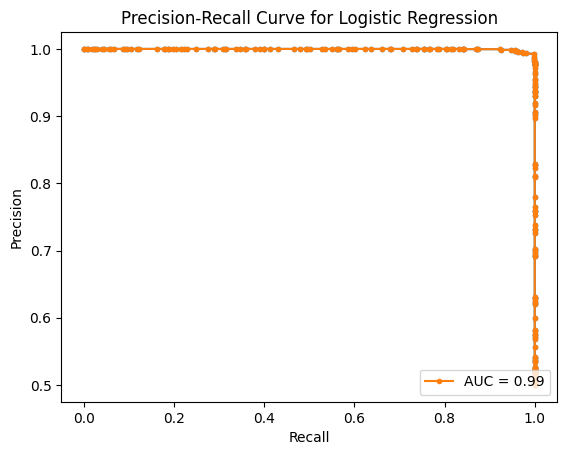

In [150]:
#Precision-Recall curve
lr_auc = average_precision_score(y_test, y_pred_lr)
precision_lr, recall_lr, _ = precision_recall_curve(y_test, lr_selected.predict_proba(X_test_selected)[:, 1]) 
plt.plot(recall_lr, precision_lr, marker='.') 
plt.xlabel('Recall') 
plt.ylabel('Precision') 
plt.title('Precision-Recall Curve for Logistic Regression') 
plt.plot(recall_lr, precision_lr, marker='.', label=f"AUC = {lr_auc:.2f}")
plt.legend(loc = 'lower right')
plt.show()

A precision-recall curve is a graph that shows the trade-off between precision and recall for different thresholds of a classification model. The area under the precision-recall curve (AUC) provides a measure of the model's overall performance.

In this case, with an AUC of 0.99 for the precision-recall curve, it indicates that the model has very high precision and recall for predicting the target variable of electric vehicle type. This means that the model is very effective at correctly identifying both battery electric vehicles and plug-in electric vehicles.

The high AUC score suggests that the model is highly accurate in distinguishing between the two types of electric vehicles. It is likely that the model is able to accurately predict the electric vehicle type based on certain features or characteristics specific to battery electric vehicles and plug-in electric vehicles.

Overall, the results suggest that the model is highly reliable and can be used effectively for classifying electric vehicles into the correct type.

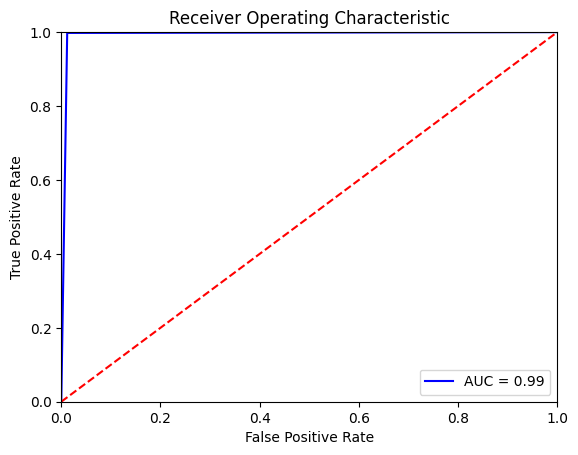

In [151]:
#ROC curve
# calculate the fpr and tpr for all thresholds of the classification
probs = lr_selected.predict_proba(X_test_selected)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test,y_pred_lr)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [152]:
#Initialize KNN classifier
knn_selected = KNeighborsClassifier()

#Fit the model
knn_selected.fit(X_train_selected, y_train)

#Make predictions
y_pred_knn_train = knn_selected.predict(X_train_selected)
y_pred_knn = knn_selected.predict(X_test_selected)

In [153]:
print("KNN Classification Report train set:") 
print(accuracy_score(y_train, y_pred_knn_train))
print("KNN Classification Report test set:") 
print(accuracy_score(y_test, y_pred_knn))

KNN Classification Report train set:
0.9950709363599514
KNN Classification Report test set:
0.9950061612296517


our predictions are almost 99.50% accurate,we have identified 99.50% of the electric vehicle type correctly for KNN model

In [154]:
print("KNN Confusion Matrix:") 
print(confusion_matrix(y_test, y_pred_knn))

KNN Confusion Matrix:
[[7649   61]
 [  16 7693]]


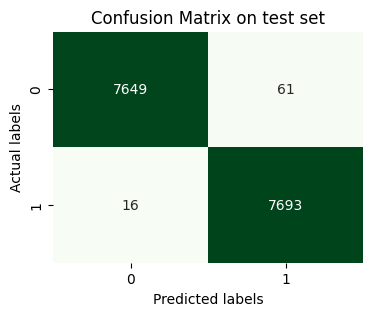

In [155]:
#Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)

#Plot the confusion matrix
plt.figure(figsize=(4, 3)) 
sns.heatmap(cm, annot=True, cmap='Greens', fmt='g', cbar=False) 
plt.xlabel('Predicted labels') 
plt.ylabel('Actual labels') 
plt.title('Confusion Matrix on test set') 
plt.show()

Based on the confusion matrix provided, there were 7649 true positive predictions for battery EV (class 0), 7693 true positive predictions for plug-in hybrid EV (class 1), 61 false negative predictions for class 0, and 16 false negative predictions for class 1.

Overall, the KNN model performed well in classifying electric vehicles as either battery EV or plug-in hybrid EV, with a high number of correct predictions for both classes.

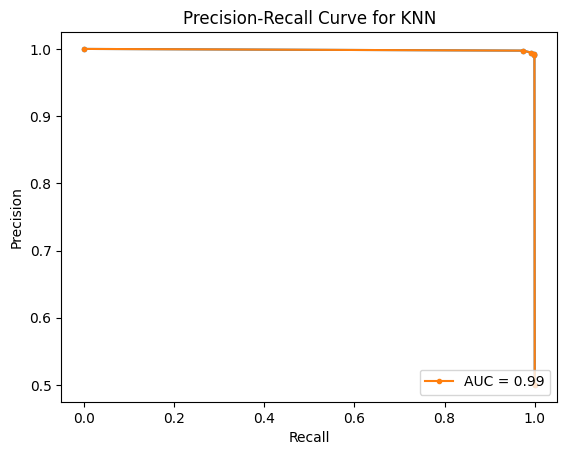

In [156]:
#Precision-Recall curve
knn_auc = average_precision_score(y_test, y_pred_knn)
precision_knn, recall_knn, _ = precision_recall_curve(y_test, knn_selected.predict_proba(X_test_selected)[:, 1]) 
plt.plot(recall_knn, precision_knn, marker='.') 
plt.xlabel('Recall') 
plt.ylabel('Precision') 
plt.title('Precision-Recall Curve for KNN') 
plt.plot(recall_knn, precision_knn, marker='.', label=f"AUC = {knn_auc:.2f}")
plt.legend(loc = 'lower right')
plt.show()

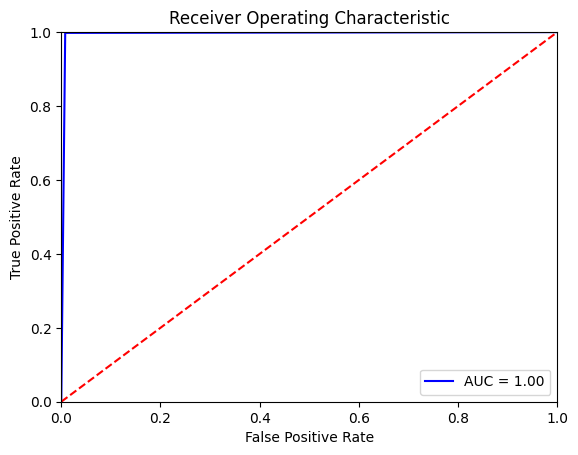

In [157]:
#ROC curve
# calculate the fpr and tpr for all thresholds of the classification
probs = knn_selected.predict_proba(X_test_selected)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test,y_pred_knn)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [158]:
#initialize naive bayes classifier
GNB_selected=GaussianNB()
#Fit the model
GNB_selected.fit(X_train_selected, y_train)

#Make predictions
y_pred_gnb_train = GNB_selected.predict(X_train_selected)
y_pred_gnb = GNB_selected.predict(X_test_selected)

In [159]:
print("Naive bayes Classification Report train set:") 
print(accuracy_score(y_train, y_pred_gnb_train))
print("Naive bayes Classification Report test set:") 
print(accuracy_score(y_test, y_pred_gnb))

Naive bayes Classification Report train set:
0.9882772598297528
Naive bayes Classification Report test set:
0.9878721058434399


our predictions are almost 98.8% accurate,we have identified 98.7% of the electric vehicle type correctly for Naive Bayes model.

In [160]:
print("Naive bayes Confusion Matrix:") 
print(confusion_matrix(y_test, y_pred_gnb))

Naive bayes Confusion Matrix:
[[7523  187]
 [   0 7709]]


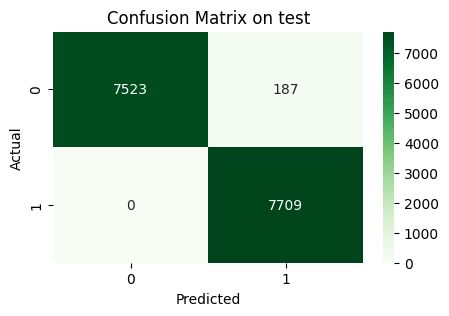

In [161]:
#Creating the confusion matrix
cm = confusion_matrix(y_test, y_pred_gnb)

#Plotting the confusion matrix
plt.figure(figsize=(5,3)) 
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens") 
plt.xlabel("Predicted")
plt.ylabel("Actual") 
plt.title("Confusion Matrix on test") 
plt.show()

In the above confusion matrix, there are 7523 true negatives, 187 false positives, 0 false negatives, and 7709 true positives. This indicates that the Naive Bayes model is performing very well in classifying electric vehicles into their respective categories (Battery EV and Plug-in Hybrid EV).

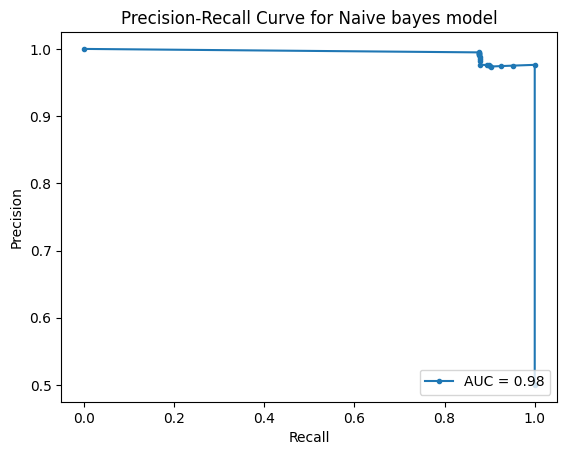

In [162]:
#Precision-Recall curve
gnb_auc = average_precision_score(y_test, y_pred_gnb)
precision_gnb, recall_gnb, _ = precision_recall_curve(y_test, GNB_selected.predict_proba(X_test_selected)[:, 1]) 
plt.xlabel('Recall') 
plt.ylabel('Precision') 
plt.title('Precision-Recall Curve for Naive bayes model') 
plt.plot(recall_gnb, precision_gnb, marker='.', label=f"AUC = {gnb_auc:.2f}")
plt.legend(loc = 'lower right')
plt.show()

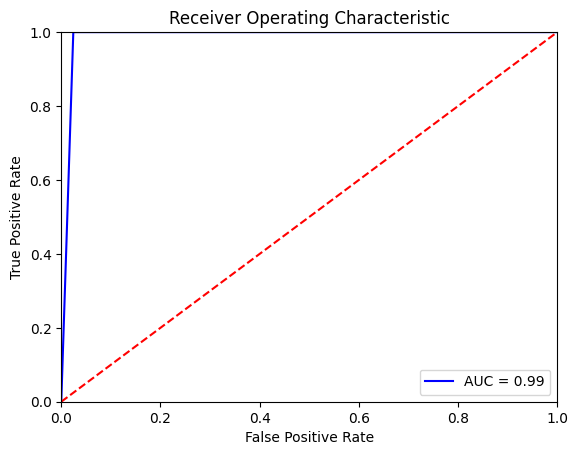

In [163]:
#ROC curve
# calculate the fpr and tpr for all thresholds of the classification
probs = GNB_selected.predict_proba(X_test_selected)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test,y_pred_gnb)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

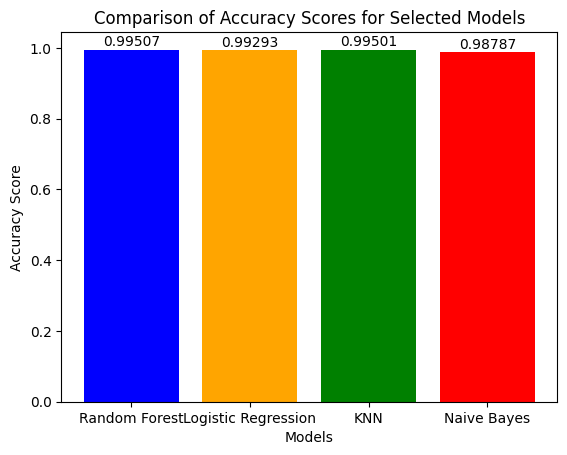

In [164]:
#Calculate the accuracy scores for each model
rf_score = rf_selected.score(X_test_selected, y_test) 
lr_score = lr_selected.score(X_test_selected, y_test) 
knn_score = knn_selected.score(X_test_selected, y_test) 
gnb_score = GNB_selected.score(X_test_selected, y_test)

#Plot the scores in a bar chart
models = ['Random Forest', 'Logistic Regression', 'KNN', 'Naive Bayes'] 
scores = [rf_score, lr_score, knn_score, gnb_score]

plt.bar(models, scores, color=['blue', 'orange', 'green', 'red']) 
plt.xlabel('Models') 
plt.ylabel('Accuracy Score') 
plt.title('Comparison of Accuracy Scores for Selected Models') 
for i in range(len(scores)): 
    plt.text(i, scores[i] + 0.01, round(scores[i], 5), ha = 'center') 
plt.show()

Based on the given accuracy scores, it can be inferred that the Random Forest and k-Nearest Neighbors (KNN) models perform better in predicting whether a vehicle is a Battery Electric Vehicle (BEV) or a Plug-in Hybrid Electric Vehicle (PHEV) compared to the Logistic Regression and Naive Bayes models.
. Random Forest is known for its ability to handle complex interactions and non-linear relationships in the data, which may be beneficial in distinguishing between the two types of electric vehicles.

SimilarVs. KNN is a simple and intuitive algorithm that works well with data that has clear boundaries between classes, which could explain its high accuracy in this scenario.

On the other hand, the Logistic Regression and Naive Bayes models have lower accuracy tively. This may indicate that these models struggle more with the complexity of the data or the relationships between the features when classifying BEVs and PHEVs.

In conclusion, the Random Forest and KNN models are likely more suited for accurately classifying BEVs and PHEVs based on the given accuracy scores, while Logistic Regression and Naive Bayes may not be as effective in this particular classification task

## Hypertunning models with low score

In [165]:
from sklearn.model_selection import GridSearchCV
#Hypertuning the model using Grid Search Cross Validation
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)} # defining parameter grid

gnb_grid = GridSearchCV(GaussianNB(), param_grid, cv=5) # using GridSearchCV with 5-fold cross validation 
gnb_grid.fit(X_train_selected, y_train) # fitting the model

#Getting the best parameters
print("Best Parameters: ", gnb_grid.best_params_)

#Making predictions with the hypertuned model
y_pred_gnb_train_grid = gnb_grid.predict(X_train_selected) 
y_pred_gnb_grid = gnb_grid.predict(X_test_selected)

Best Parameters:  {'var_smoothing': 0.012328467394420659}


In [166]:
#Calculating accuracy score for the hypertuned model 
train_accuracy_gnb_grid = accuracy_score(y_train, y_pred_gnb_train_grid)
test_accuracy_gnb_grid = accuracy_score(y_test, y_pred_gnb_grid)

print("Training Accuracy with Grid Search Cross Validation: ", train_accuracy_gnb_grid) 
print("Test Accuracy with Grid Search Cross Validation: ", test_accuracy_gnb_grid)

Training Accuracy with Grid Search Cross Validation:  0.9882772598297528
Test Accuracy with Grid Search Cross Validation:  0.9878721058434399


In [167]:
#Define parameters to hypertune 
params = {'C': [0.001, 0.01, 0.1, 1, 10]}

#Initialize GridSearchCV with the Logistic Regression classifier and parameters 
grid_search_lr = GridSearchCV(LogisticRegression(max_iter=1000), params, cv=5)

#Fit the model with hypertuning 
grid_search_lr.fit(X_train_selected, y_train)

#Get the best parameters and best score from the hypertuning 
best_params = grid_search_lr.best_params_ 
best_score = grid_search_lr.best_score_

#Make predictions with the hypertuned model 
y_pred_lr_train_hypertuned = grid_search_lr.predict(X_train_selected) 
y_pred_lr_hypertuned = grid_search_lr.predict(X_test_selected)

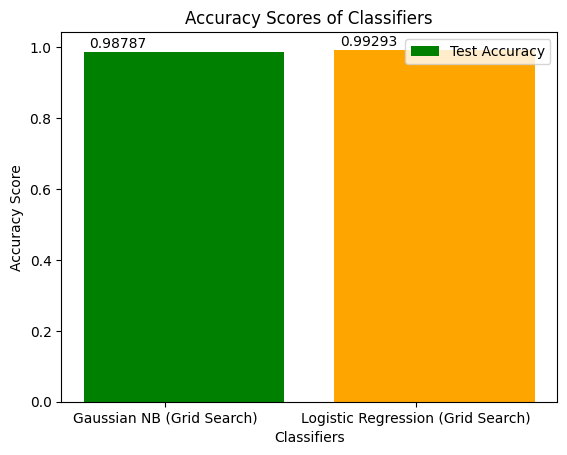

In [179]:
#Creating a bar chart to compare the training and test accuracy of different classifiers
classifiers = ['Gaussian NB (Grid Search)', 'Logistic Regression (Grid Search)'] 
test_accuracy = [test_accuracy_gnb_grid, accuracy_score(y_test, y_pred_lr_hypertuned)]

x = range(len(classifiers))

fig, ax = plt.subplots() 

bar2 = ax.bar([i + bar_width for i in x], test_accuracy, label='Test Accuracy',color=['green','orange'])

ax.set_xlabel('Classifiers') 
ax.set_ylabel('Accuracy Score') 
ax.set_title('Accuracy Scores of Classifiers') 
ax.set_xticks([i + bar_width/2 for i in x]) 
ax.set_xticklabels(classifiers, rotation=0) 
ax.legend()
for i in range(len(test_accuracy)): 
    plt.text(i, test_accuracy[i] + 0.01, round(test_accuracy[i], 5), ha = 'right') 
plt.show()

HYpertunning didnt have effect on the accuracy of the models 

## Cross Validation

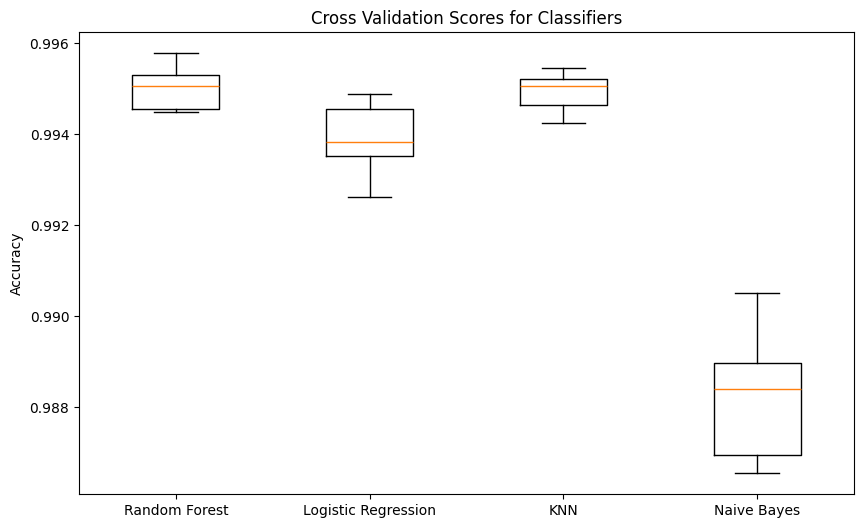

In [183]:
from sklearn.model_selection import cross_val_score
#Define a list of classifiers
classifiers = [rf_selected, lr_selected, knn_selected, GNB_selected] 
classifier_names = ['Random Forest', 'Logistic Regression', 'KNN', 'Naive Bayes']

#Calculate cross validation scores for each classifier
cv_scores = [] 
for clf in classifiers: 
    scores = cross_val_score(clf, X_train_selected, y_train, cv=5) 
    cv_scores.append(scores)

#Plot the cross validation scores in a box plot
plt.figure(figsize=(10, 6)) 
plt.boxplot(cv_scores, labels=classifier_names) 
plt.title('Cross Validation Scores for Classifiers') 
plt.ylabel('Accuracy') 
plt.show()

The cross validation scores indicate the performance of each model on the dataset. A higher score indicates better performance.

From the scores, it can be observed that Random Forest and Logistic Regression have the highest average scores, indicating that they perform well on the dataset. KNN also has a decent performance, though slightly lower than Random Forest and Logistic Regression. Naive Bayes has the lowest average score among the models, showing that its performance is comparatively weaker on the dataset.

Overall, Random Forest and Logistic Regression seem to be the best performing models based on the cross validation scores. It is essential to consider other factors like model complexity, interpretability, and computational resources before finalizing the choice of the model for the dataset.

## Feature importance

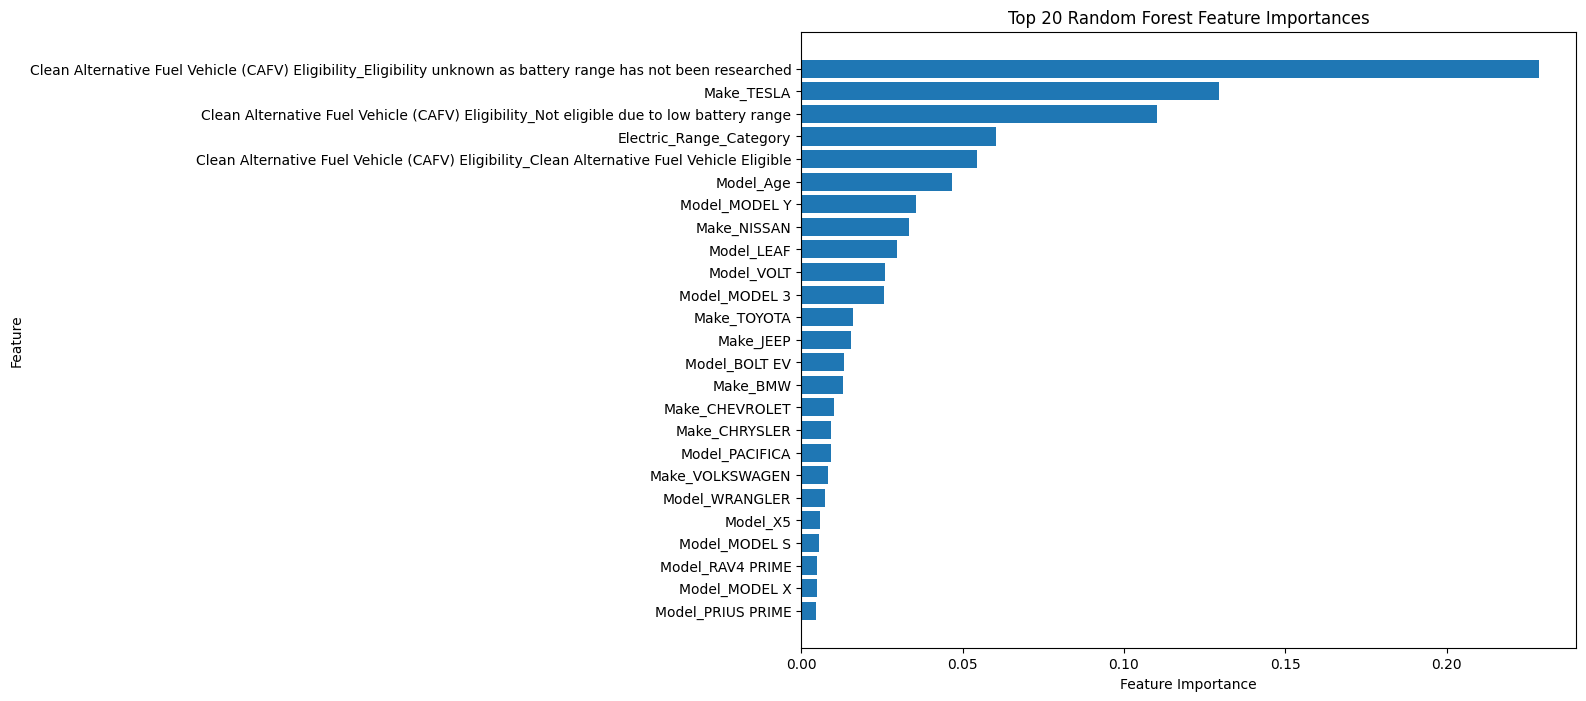

In [184]:
# Get feature importances from the model
feature_importance = rf.feature_importances_

# Get the names of the features
features = X.columns

# Sort the features by their importance
sorted_idx = np.argsort(feature_importance)

top_features = 25
plt.figure(figsize=(10, 8)) 
plt.barh(range(top_features), feature_importance[sorted_idx][-top_features:], align='center') 
plt.yticks(range(top_features), features[sorted_idx][-top_features:]) 
plt.xlabel('Feature Importance') 
plt.ylabel('Feature') 
plt.title('Top 20 Random Forest Feature Importances') 
plt.show()

In [185]:
top_25_features = list(zip(features[sorted_idx][-top_features:], feature_importance[sorted_idx][-top_features:])) 
for feature in top_25_features:
    print(feature)

('Model_PRIUS PRIME', 0.00472960747792891)
('Model_MODEL X', 0.004826622637318987)
('Model_RAV4 PRIME', 0.004874950201828242)
('Model_MODEL S', 0.005452635173455238)
('Model_X5', 0.005877037190027298)
('Model_WRANGLER', 0.007492776009913508)
('Make_VOLKSWAGEN', 0.008356391238173786)
('Model_PACIFICA', 0.009147747466456527)
('Make_CHRYSLER', 0.009301342329460234)
('Make_CHEVROLET', 0.010205223908682962)
('Make_BMW', 0.01290505655676101)
('Model_BOLT EV', 0.01319509820403429)
('Make_JEEP', 0.01555414798530106)
('Make_TOYOTA', 0.01599415706592951)
('Model_MODEL 3', 0.025640567853482912)
('Model_VOLT', 0.02611337854836302)
('Model_LEAF', 0.029547497710312426)
('Make_NISSAN', 0.03334411250160993)
('Model_MODEL Y', 0.03556333245136844)
('Model_Age', 0.04669848803640409)
('Clean Alternative Fuel Vehicle (CAFV) Eligibility_Clean Alternative Fuel Vehicle Eligible', 0.054386054295376206)
('Electric_Range_Category', 0.06038506727583481)
('Clean Alternative Fuel Vehicle (CAFV) Eligibility_Not elig

#### Feature importance refers to the contribution of each feature to the predictive power of the model. In this case, the most important features for determining electric vehicle type (BEV or PHEV) include "Clean Alternative Fuel Vehicle (CAFV) Eligibility", "Electric Range Category", "Make_TESLA", "Model_Age", and various make and model variables.

#### From the feature importance values, we can see that eligibility for Clean Alternative Fuel Vehicle (CAFV) incentives greatly impacts the prediction of electric vehicle type. Specifically, vehicles that are not eligible for CAFV incentives due to low battery range or have unknown eligibility due to lack of research are more likely to be classified as BEVs. On the other hand, vehicles that are CAFV eligible or have higher battery range categories are more likely to be classified as PHEVs.

#### The make and model variables also play a significant role in determining electric vehicle type. For example, Tesla vehicles are more likely to be classified as BEVs, while models like the Prius Prime and RAV4 Prime are more likely to be PHEVs. This suggests that factors such as eligibility for incentives or rebates related to clean fuel vehicles and the range of the vehicle on electric power play a significant role in consumer decision-making.

### Given these insights, a possible hypothesis statement could be:

### "H1: There is a relationship between electric vehicle type (BEV or PHEV) and eligibility for Clean Alternative Fuel Vehicle (CAFV) incentives, with factors such as battery range, make, and model influencing consumer preferences and choices in the electric vehicle market so we would reject null hypothesis

#### This hypothesis could be further validated through additional research and analysis to understand the impact of factors such as base MSRP, and legislative district on consumer preferences and choices in the electric vehicle market.ket.

# Conclusion:

### Based on the results of the classification model, we can see that the model performs extremely well on both the training and test sets, with high accuracy scores and minimal discrepancies between the two sets. This indicates that the model is robust and generalizes well to unseen data.

### The random forest and KNN model performs very well on both the train and test sets with high precision, recall, and f1-score values for both classes.Logistic regression and naive bayes also performed well on both train and test sets.

### The confusion matrix shows that the model has a high accuracy in predicting both classes on both the train and test sets.

### The most important features for predicting the target variable (electric vehicle purchase) include the make and model of the vehicle, the age of the vehicle, eligibility for clean alternative fuel vehicle (CAFV), electric range category, and make of the vehicle, with TESLA, Electric Range Category, and Clean Alternative Fuel Vehicle (CAFV) Eligibility being the most important features.

### TESLA is the most influential make in predicting electric vehicle purchases, followed by the Electric Range Category and Clean Alternative Fuel Vehicle (CAFV) Eligibility.

### The model shows that customers are more likely to purchase electric vehicles with higher electric ranges, eligibility for clean alternative fuel vehicle (CAFV), and certain makes/models like TESLA.

### Overall, the models provides valuable insights into the factors that influence electric vehicle purchases and can be used to make informed business decisions in the electric vehicle market.

### Business perspective: The insights provided by the classification model can be used to tailor marketing strategies towards promoting electric vehicles with higher electric ranges, highlighting the eligibility for clean alternative fuel vehicle (CAFV), and emphasizing popular makes/models like TESLA. This information can help stakeholders in the electric vehicle industry better understand consumer preferences and make informed decisions on product development, marketing campaigns, and public policy initiatives.

### Additionally, businesses can use the information on the impact of BEV and PHEV characteristics on consumer preferences to develop pricing strategies, product features, and marketing messages that resonate with their target audience. By aligning product offerings with consumer preferences, companies can attract more customers and increase market share in the growing electric vehicle industry.

### Consumers can also leverage this information to make more informed decisions when purchasing an electric vehicle. By considering factors such as electric range, base MSRP, eligibility for incentives, and make/model preferences, consumers can choose a vehicle that best suits their lifestyle, budget, and environmental values. This knowledge empowers consumers to make choices that align with their individual needs and preferences, contributing to the wider adoption of electric vehicles and the transition to a sustainable transportation system.